# Sprint 7: Proyecto

El proyecto consiste en la simulación del trabajo de un analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. La tarea es encontrar patrones en la información disponible. Queremos comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Al trabajar con una base de datos, se analizarán los datos de los competidores y se probará una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

## Análisis exploratorio de datos

### Preparación de los datos

#### Importar archivos

Importaremos las librerias necesarias, así como los archivos que contienen los datos que vamos a analizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import levene, ttest_ind

In [3]:
company = pd.read_csv('project_sql_result_01.csv')
location = pd.read_csv('project_sql_result_04.csv')
clima = pd.read_csv("project_sql_result_07.csv")

#### Estudio de los datos

Revisaremos los datos que contienen y el tipo de datos, además verificaremos no contar con filas duplicadas de la tabla company

In [44]:
# Imprimimos la información de la tabla
company.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [45]:
#Mostramos su contenido
company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [46]:
#Verificamos duplicados
company.duplicated().sum()

0

Nos encontramos con que todos los datos de la tabla company están en orden, procederemos a revisar la tabla location.

In [47]:
location.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [48]:
location.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [49]:
location.duplicated().sum()

0

Repetiremos el análisis con la tabla clima.

In [50]:
clima.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [51]:
clima.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [52]:
clima['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

In [53]:
clima.duplicated().sum()

197

In [54]:
#Eliminaremos las filas duplicadas
clima = clima.drop_duplicates()
clima_new = clima.dropna()

In [55]:
clima_new.shape

(871, 3)

Los tipos de datos corresponden a los valores que se muestran, nos encontramos con valores duplicados en la última tabla por lo que procedimos a eliminarlos.

### Análisis de datos y gráficos

#### Los 10 principales barrios en términos de finalización del recorrido

In [56]:
#agruparemos los datos de los barrios en función de la finalización del recorrido y ordenaremos
top_barrios = location.groupby("dropoff_location_name")["average_trips"].sum().sort_values().tail(10)
print(top_barrios)

dropoff_location_name
Sheffield & DePaul     1259.766667
Gold Coast             1364.233333
Museum Campus          1510.000000
Grant Park             2068.533333
Lake View              2420.966667
O'Hare                 2546.900000
West Loop              5163.666667
Streeterville          6664.666667
River North            9523.666667
Loop                  10727.466667
Name: average_trips, dtype: float64


<AxesSubplot:xlabel='Ubicación de finalización del recorrido', ylabel='Promedio de viajes'>

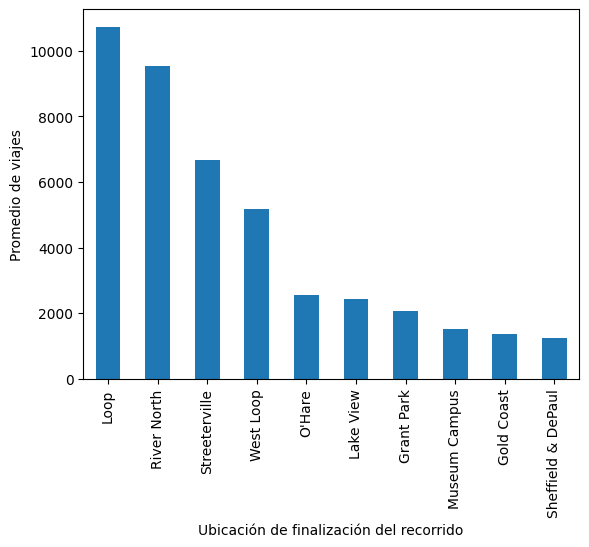

In [57]:
#Realizamos un gráfica de barras mediante plot
(
    top_barrios.groupby("dropoff_location_name")
    .mean()
    .sort_values(ascending=False)
    .plot(kind="bar", xlabel="Ubicación de finalización del recorrido", ylabel="Promedio de viajes")
)

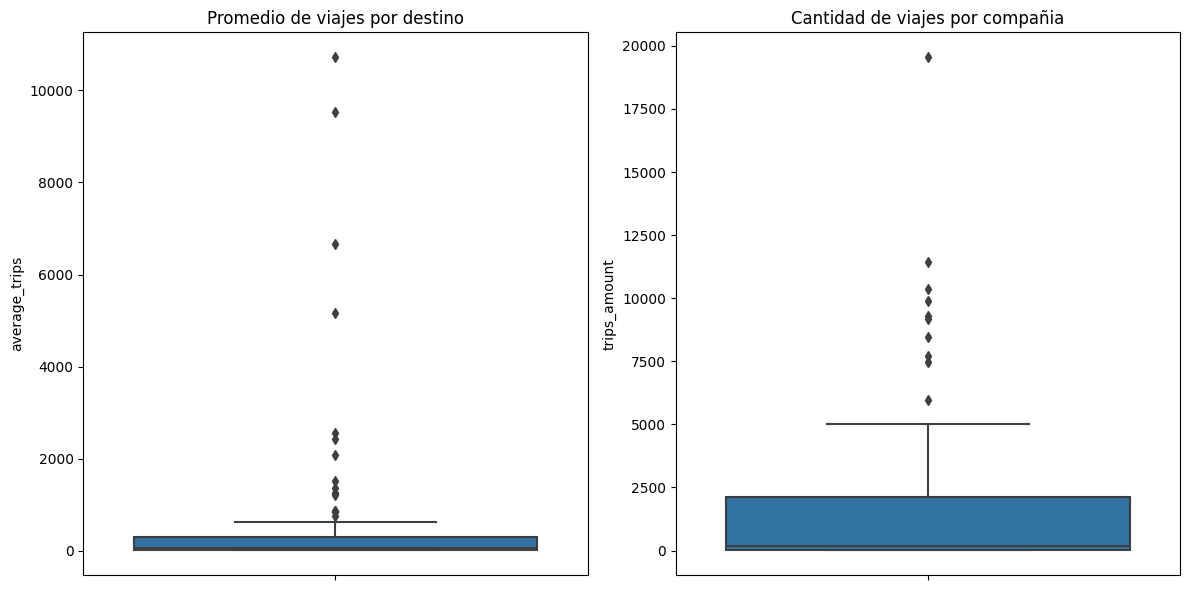

In [58]:
#Revisaremos si existen valores atipicos mediante un diagrama de cajas con ambas tablas
#Creamos la figura y sus ejes
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de caja para 'location' en el primer subgráfico
sns.boxplot(data=location, y='average_trips', ax=axes[0])
axes[0].set_title('Promedio de viajes por destino')

# Gráfico de caja para 'company' en el segundo subgráfico
sns.boxplot(data=company, y='trips_amount', ax=axes[1])
axes[1].set_title('Cantidad de viajes por compañia')

# Mostrar la figura
plt.tight_layout()
plt.show()

#### Empresas de taxis y números de viajes

<AxesSubplot:xlabel='Nombre de la compañia', ylabel='Cantidad de viajes'>

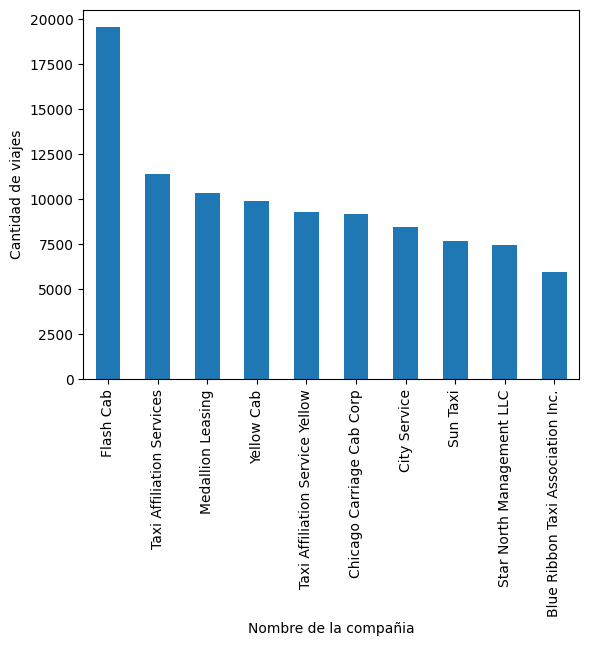

In [59]:
top_company = company.groupby("company_name")["trips_amount"].sum().sort_values().tail(10)

(
    top_company.groupby("company_name")
    .mean()
    .sort_values(ascending=False)
    .plot(kind="bar", xlabel="Nombre de la compañia", ylabel="Cantidad de viajes")
)

### Conclusiones 

Nos encontramos con datos que no  requirieron modificaciones en los tipos, solamente un duplicado en la tabla con las condiciones climaticas. En cuanto al análisis observamos que el destino más popular en el servicio de taxis es Loop, seguido River North y Streeterville. También podemos ver que la compañía de taxis con mayor cantidad de viajes por mucho es Flash Cab, el resto de compañias no tienen una variación tan significativa en la cantidad de viajes. Al realizar los diagramas de cajas nos encontramos con valores atipicos, que son demasiado fuera del rango de los valores usuales, por lo que al hacer nuestra prueba de hipótesis se pueda observar la varianza afectada por ellos.

## Prueba de hipótesis

El resultado de la última consulta. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. 

### Prueba la hipótesis:

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Tomaremos el valor de alfa como 5% debido a que es el estándar. Nuestras hipótesis son las siguientes;

-Hipótesis nula (H0): la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es igual los sábados lluviosos

-Hipótesis alternativa (H1): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos. 

Nuestra prueba será ttest debido a la cantidad de datos a analizar y porque será una comparación entre dos grupos.

In [61]:
#Dividiremos nuestra tabla en dos dependiendo de la condición climática
bad = clima_new[clima_new["weather_conditions"] == 'Bad']["duration_seconds"]
good = clima_new[clima_new["weather_conditions"] == 'Good']["duration_seconds"]

In [74]:
#Agregaremos una prueba de Levenne para detrminar si las varianzas son iguales y proceder con la prueba ttest.

statistic, p_value = levene(
    bad,
    good,
)

p_value

alpha = 0.05
if p_value < alpha:
    print('Varianzas diferentes')
else:
    print('Varianzas iguales')

Varianzas iguales


Podemos asumir que las varianzas son iguales, adicionalmente visualizaremos su distribución mediante un gráfico

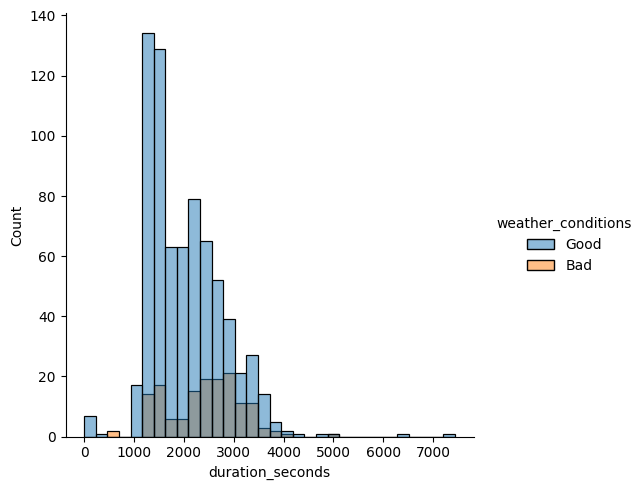

In [72]:
sns.displot(clima_new, hue='weather_conditions', x='duration_seconds')

In [75]:
#importamos la prueba
from scipy.stats import ttest_ind


stat, p_value = ttest_ind(
    bad,
    good,
    #Reafirmamos que las varianzas son iguales para complementar la prueba
    equal_var = True
)
p_value

#deteminamos alfa
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.")
else:
    print("No podemos rechazar la hipótesis nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es igual los sábados lluviosos.")


Rechazamos la hipótesis nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.


Observamos que de acuerdo a nuestra prueba estadística, que las varianzas entre ambos grupos parecen ser similares por lo que no podemos descartar que sean distintas, de modo que no hay diferencia en la duración de los viajes desde el Loop hasta el aeropuerto entre los días lluviosos y no lluviosos.